In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

In [160]:
size = 0
for file_name in glob.glob('/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_15_data.npy'):
    x = np.load(file_name, mmap_mode="r")
    print(file_name, len(x))
    size = size +len(x)
print(size)

/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_15_data.npy 3818
3818


In [161]:
size = 0
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_NuE_1_1_15_data.npz'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, len(x))
    size = size +len(x)
print(size)

/home/dup193/work/double_pulse/data/images_3str/Images_NuE_1_1_15_data.npz 4260
4260


In [155]:
dtype = np.load('/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuENC_Qtot1000_Qst400_1_15_data.npy', mmap_mode="r")[0].dtype

In [156]:
pos = 0
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_old_NuECC_1_1.npy', mode = 'w+', dtype = dtype, shape=(size,1))
for file_name in glob.glob('/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_1?_data.npy'):
    x = np.load(file_name, mmap_mode="r")
    print(file_name, x.shape)
    data[pos:pos+len(x)] = x
    pos = pos + len(x)

/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_14_data.npy (3722, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_10_data.npy (3805, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_17_data.npy (3701, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_19_data.npy (3690, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_16_data.npy (3837, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_18_data.npy (3847, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_11_data.npy (3785, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_12_data.npy (3818, 1)
/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_15_data.npy (3818, 1)
/home/dup193/work/double_pulse/data/L

In [162]:
data = np.load('/home/dup193/work/double_pulse/data/images_3str/Images_NuE_1_1_15_data.npz')['arr_0']
print(data.shape)
data_old = np.load('/home/dup193/work/double_pulse/data/LoganVeto_data/LoganVeto_NuECC_Qtot1000_Qst400_1_15_data.npy')
print(data_old.shape)

(4260, 1)
(3818, 1)


In [163]:
list_n = [tuple(i[0]) for i in data['id']]
list_o = [tuple(i[0]) for i in data_old['id']]
print(len(list_n),list_n[0])
print(len(list_o),list_o[0])

4260 (155, 4294967295, 3, 0)
3818 (155, 4294967295, 3, 0)


In [164]:
arr_n = np.array(list_n)
arr_o = np.array(list_o)
print(np.unique(arr_n[:,0]))
print(np.unique(arr_o[:,0]))

[150 151 152 153 154 155 156 157 158 159]
[150 151 152 153 154 155 156 157 158 159]


In [165]:
set_n = set(list_n)
set_o = set(list_o)
diff = set_o.difference(set_n) 
diff2 = set_n.difference(set_o) 

In [166]:
#print(len(diff),list(diff)[0:10])
#print(len(diff2),list(diff2)[0:10])

arr_diff_2 = np.array(list(diff2))
print(np.unique(arr_diff_2[:,0]))

[150 151 152 153 154 155 156 157 158 159]


In [167]:
np.save("/home/dup193/work/double_pulse/Diff_old_IDs2.npy",list(diff2))

In [168]:
diff_events = []
for i in data:
    if tuple(i['id'][0]) in diff2:
        diff_events.append(i)
diff_events = np.array(diff_events)

In [169]:
np.unique(diff_events['weight']['InteractionType'][0])

array([1.], dtype=float32)

In [170]:
l_prd_n = [i for i in data['prim_daughter']['pdg']]
l_prd_o = [i for i in data_old['daughter']['pdg']]
print(len(l_prd_n),l_prd_n[0])
print(len(l_prd_o),l_prd_o[0])
arr_prd_n = np.array(l_prd_n)
arr_prd_o = np.array(l_prd_o)
print(np.int32(np.unique(arr_prd_n, return_counts=True)))
print(np.int32(np.unique(arr_prd_o, return_counts=True)))

4260 [-11]
3818 [4294967285]
[[-2000001006         -14         -12         -11          11          12]
 [       1155           1          21         604        2085         394]]
[[         11          12 -2000001006         -14         -12         -11]
 [       1879         382        1007           1          20         529]]


In [171]:
l_de_pdg = [i for i in diff_events['prim_daughter']['pdg']]
print(len(l_de_pdg),l_de_pdg[0])
arr_de_pdg = np.array(l_de_pdg)
print(np.int32(np.unique(arr_de_pdg, return_counts=True)))

442 [-11]
[[-2000001006         -12         -11          11          12]
 [        148           1          75         206          12]]


In [204]:
diff_events['prim_daughter']

array([[([1342084715,      26114],         -11, 5.95611992e+04, [-5.53740906e+02, -3.83685417e+01,  3.79760956e+02], [0.32090586, 0.41969073],  1.04577705e+04,       0. )],
       [([1342084715,      35141],          11, 6.92122217e+03, [-3.75181915e+02, -2.76235321e+02, -2.17921219e+02], [2.1116815 , 5.6922264 ],  9.57359766e+03,       0. )],
       [([1342084715,      57250],          11, 1.14392211e+05, [ 3.76889465e+02,  4.91281158e+02,  3.47649811e+02], [1.5247449 , 5.4440837 ],  9.64303711e+03,       0. )],
       [([1342084715,      64543], -2000001006, 2.06126641e+04, [ 2.27614617e+00,  4.96412201e+02, -2.64548416e+01], [1.1344786 , 6.2653804 ],  9.74940723e+03,       0. )],
       [([1342084715,      89086],          11, 4.17171719e+04, [-4.59142761e+02,  4.30799561e+02, -3.40730743e+02], [1.827585  , 4.9610777 ],  9.34663477e+03,       0. )],
       [([1342084715,     121985],          11, 1.69108730e+04, [ 4.76109558e+02,  3.45023987e+02,  3.56884155e+02], [2.5930529 , 0.799

In [198]:
dm12= diff_events[np.int32(diff_events['prim_daughter']['pdg'])==-12]

In [206]:
print(dm12['qtot'])
print(dm12['qst'])
print(dm12['primary_child_pdg'])

[1865.2]
[[(613.25 , 18,     0.   ) (289.95 , 84, 20862.285)
  (254.625, 26, 15565.003)]]
[[-1.200000e+01 -2.000001e+09  0.000000e+00]]


In [172]:
print(np.sum(diff_events['qtot']>1000))
print(np.sum(diff_events['qst'][:,0]['q'][:,0]>400))

442
442


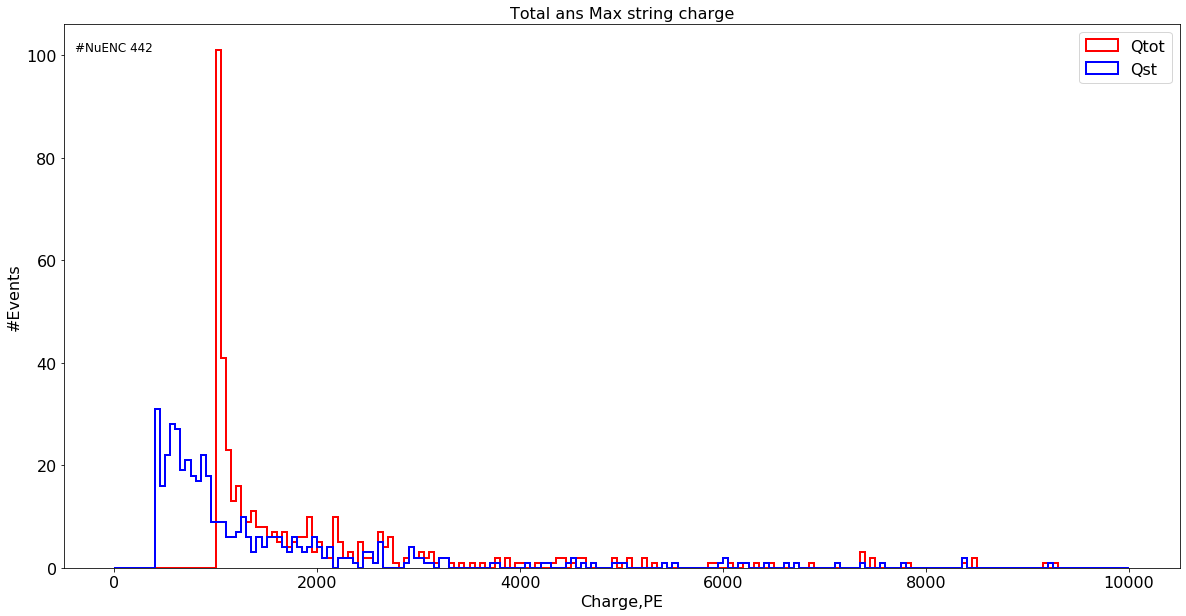

In [173]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Total ans Max string charge", fontsize = 16)
ax.text(0.01,0.95,'#NuENC '+str(len(diff_events)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Charge,PE', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(diff_events['qtot'], bins =200, histtype = 'step',edgecolor ='r', lw =2, range = [0,10000],label = "Qtot")  
ax.hist(diff_events['qst'][:,0]['q'][:,0], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [0,10000],label = "Qst")  

plt.legend()
plt.show()

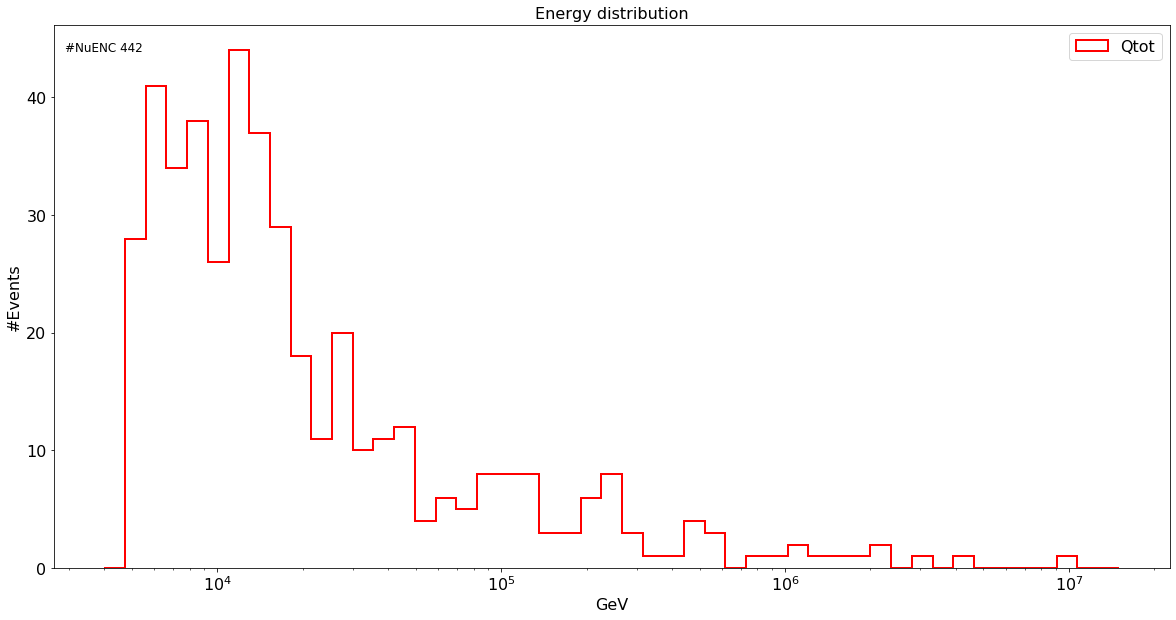

In [174]:
bins=np.logspace(np.log10(4000),np.log10(15000000), 50)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_title("Energy distribution", fontsize = 16)
ax.text(0.01,0.95,'#NuENC '+str(len(diff_events)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('GeV', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(diff_events['primary']['energy'], bins =bins, histtype = 'step',edgecolor ='r', lw =2,label = "Qtot")  
#ax.hist(diff_events['qst'][:,0]['q'][:,0], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [0,10000],label = "Qst")  

plt.legend()
plt.show()

No handles with labels found to put in legend.


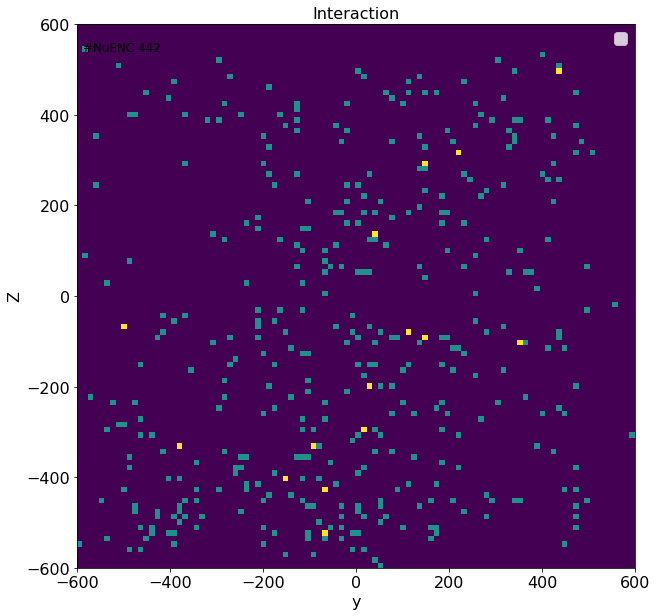

In [175]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Interaction", fontsize = 16)
ax.text(0.01,0.95,'#NuENC '+str(len(diff_events)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('y', fontsize = 16)                                                              
ax.set_ylabel("Z", fontsize = 16)                                                   
ax.hist2d(diff_events['prim_daughter']['position'][:,0][:,1],diff_events['prim_daughter']['position'][:,0][:,2], bins =100, range = [[-600, 600], [-600, 600]],label = "Qtot")  
#ax.hist(diff_events['qst'][:,0]['q'][:,0], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [0,10000],label = "Qst")  

plt.legend()
plt.show()

No handles with labels found to put in legend.


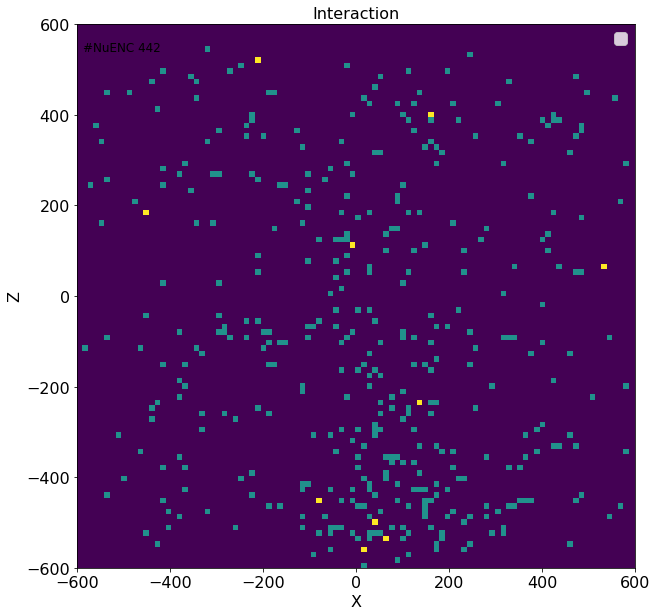

In [176]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Interaction", fontsize = 16)
ax.text(0.01,0.95,'#NuENC '+str(len(diff_events)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('X', fontsize = 16)                                                              
ax.set_ylabel("Z", fontsize = 16)                                                   
ax.hist2d(diff_events['prim_daughter']['position'][:,0][:,0],diff_events['prim_daughter']['position'][:,0][:,2], bins =100, range = [[-600, 600], [-600, 600]],label = "Qtot")  
#ax.hist(diff_events['qst'][:,0]['q'][:,0], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [0,10000],label = "Qst")  

plt.legend()
plt.show()

In [177]:
data['logan_veto']

array([[(-999., 999., -999., 999., 999., 999., -999.)],
       [(-999., 999., -999., 999., 999., 999., -999.)],
       [(-999., 999., -999., 999., 999., 999., -999.)],
       ...,
       [(-999., 999., -999., 999., 999., 999., -999.)],
       [(-999., 999., -999., 999., 999., 999., -999.)],
       [(-999., 999., -999., 999., 999., 999., -999.)]],
      dtype=[('SPE_rlogl', '<f4'), ('Cascade_rlogl', '<f4'), ('SPE_rlogl_noDC', '<f4'), ('Cascade_rlogl_noDC', '<f4'), ('FirstHitZ', '<f4'), ('VHESelfVetoVertexPosZ', '<f4'), ('LeastDistanceToPolygon_Veto', '<f4')])

No handles with labels found to put in legend.


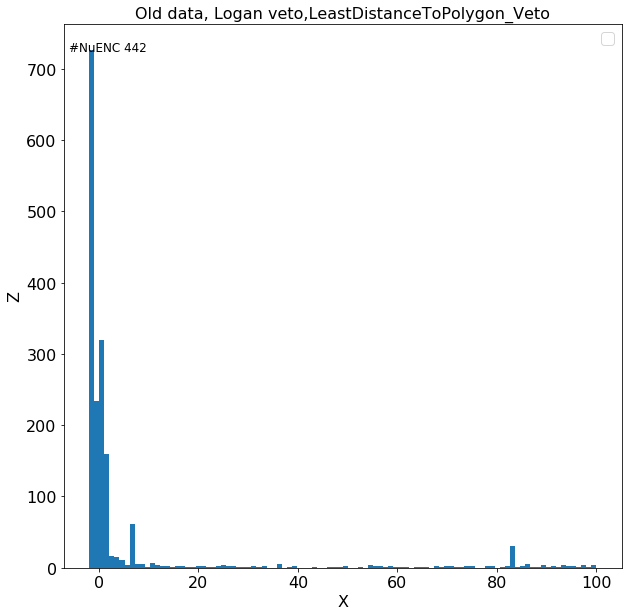

In [178]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Old data, Logan veto,LeastDistanceToPolygon_Veto", fontsize = 16)
ax.text(0.01,0.95,'#NuENC '+str(len(diff_events)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('X', fontsize = 16)                                                              
ax.set_ylabel("Z", fontsize = 16)                                                   
ax.hist(data_old['logan_veto']['LeastDistanceToPolygon_Veto'][:,0], bins =100, range = [-2, 100])  
#ax.hist(diff_events['qst'][:,0]['q'][:,0], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [0,10000],label = "Qst")  

plt.legend()
plt.show()

No handles with labels found to put in legend.


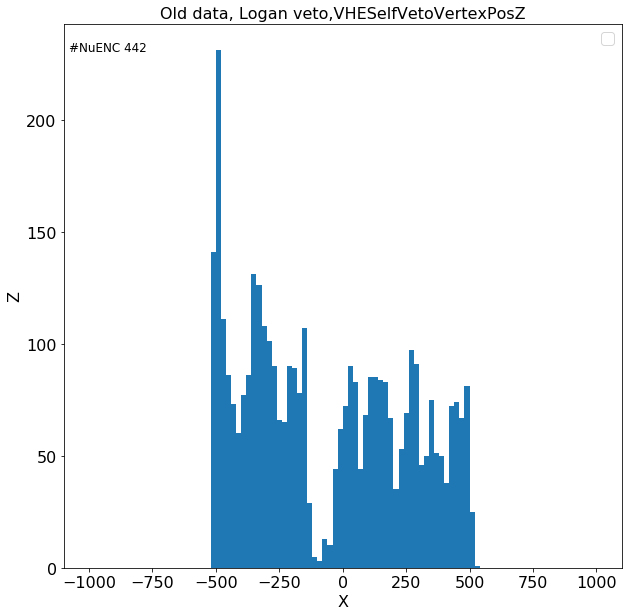

In [179]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Old data, Logan veto,VHESelfVetoVertexPosZ", fontsize = 16)
ax.text(0.01,0.95,'#NuENC '+str(len(diff_events)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('X', fontsize = 16)                                                              
ax.set_ylabel("Z", fontsize = 16)                                                   
ax.hist(data_old['logan_veto']['VHESelfVetoVertexPosZ'][:,0], bins =100, range = [-1000, 1000])  
#ax.hist(diff_events['qst'][:,0]['q'][:,0], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [0,10000],label = "Qst")  

plt.legend()
plt.show()

In [180]:
data_all = np.load('/home/dup193/work/double_pulse/data/mctree_check/NewFormat_All_MCTree_NuE_1_data.npz')['arr_0']
print(data_all.shape)

(1412887, 1)


In [181]:
diff_events_all = []
for i in data_all:
    if tuple(i['id'][0]) in diff2:
        diff_events_all.append(i)
diff_events_all = np.array(diff_events_all)

In [182]:
print(diff_events_all[0].dtype)

[('id', [('run_id', '<u4'), ('sub_run_id', '<u4'), ('event_id', '<u4'), ('sub_event_id', '<u4')]), ('neutrino', [('tree_id', '<u4', (2,)), ('pdg', '<i4'), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')]), ('nutaus', [('tree_id', '<u4', (2,)), ('parent_id', '<u4', (2,)), ('pdg', '<i4'), ('parent_pdg', '<i4'), ('children_pdgs', '<i4', (10,)), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')], (10,)), ('taus', [('tree_id', '<u4', (2,)), ('parent_id', '<u4', (2,)), ('pdg', '<i4'), ('parent_pdg', '<i4'), ('children_pdgs', '<i4', (10,)), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')], (10,)), ('muons', [('tree_id', '<u4', (2,)), ('parent_id', '<u4', (2,)), ('pdg', '<i4'), ('parent_pdg', '<i4'), ('children_pdgs', '<i4', (10,)), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '

In [183]:
print(len(diff_events_all))
dkeys = diff_events_all['keys']
print(dkeys[0].dtype.names)

442
('passed', 'header', 'raw_data', 'weights', 'mctree', 'cvstats', 'pulses', 'conventional', 'simtrimmer', 'filtermask')


['passed', 'header', 'raw_data', 'weights', 'mctree', 'cvstats', 'pulses', 'conventional', 'simtrimmer', 'filtermask']
[95.92760180995475, 100.0, 100.0, 100.0, 100.0, 95.92760180995475, 100.0, 66.9683257918552, 0.0, 100.0]


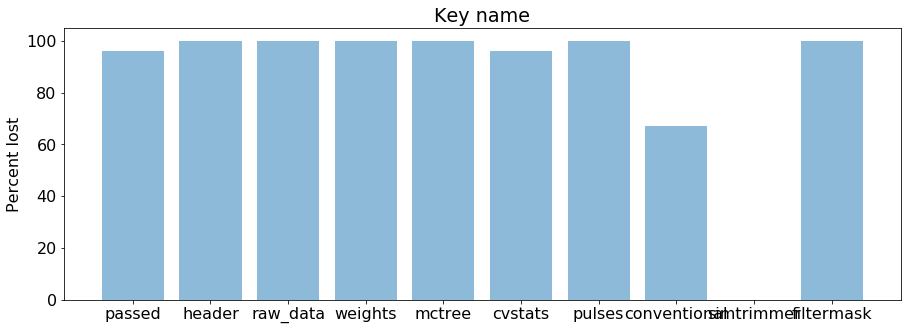

In [192]:
fig = plt.figure(figsize=(15,5),facecolor='w')
objects = list(dkeys[0].dtype.names)
#objects.remove('conventional')
#objects.remove('simtrimmer')
#objects.remove('filtermask')

print(objects)
y_pos = np.arange(len(objects))

perc = [np.sum(dkeys['passed']), np.sum(dkeys['header']), np.sum(dkeys['raw_data']),np.sum(dkeys['weights']), np.sum(dkeys['mctree']), np.sum(dkeys['cvstats']), np.sum(dkeys['pulses']), np.sum(dkeys['conventional']), np.sum(dkeys['simtrimmer']), np.sum(dkeys['filtermask'])]
perc = [i/len(dkeys)*100 for i in perc]
print(perc)
plt.bar(y_pos, perc, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
#plt.yscale('log')
plt.ylabel('Percent lost')
plt.title('Key name')

plt.show()

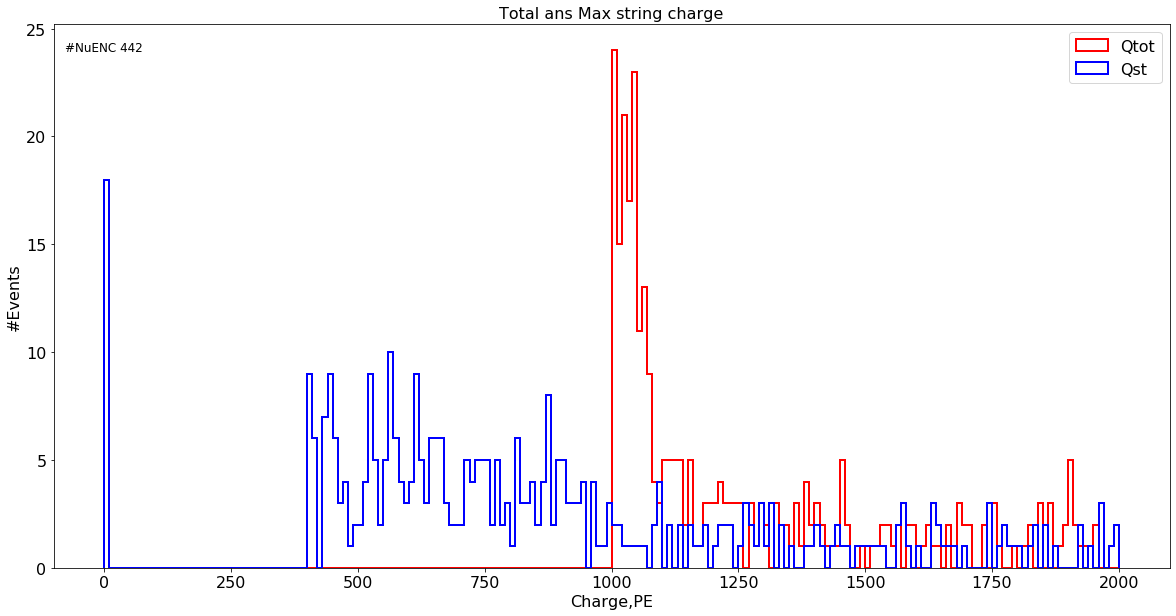

In [185]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_title("Total ans Max string charge", fontsize = 16)
ax.text(0.01,0.95,'#NuENC '+str(len(diff_events)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Charge,PE', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(diff_events_all['qtot'], bins =200, histtype = 'step',edgecolor ='r', lw =2, range = [0,2000],label = "Qtot")  
ax.hist(diff_events_all['qst'], bins =200, histtype = 'step',edgecolor ='b', lw =2, range = [0,2000],label = "Qst")  
#ax.hist(diff_events_all['hese_qtot'], bins =200, histtype = 'step',edgecolor ='g', lw =2, range = [0,2000],label = "Qst")  

plt.legend()
plt.show()

In [193]:
diff_events_all[diff_events_all['qst'] ==0]['keys']

array([(False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True, False, False,  True),
       (False,  True,  True,  True,  True, False,  True, False, False,  True),
       (False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True,  True, False,  True),
       (False,  True,  True,  True,  True, False,  True, False, False,  True),
       (False,  True,  True,  True,  True, False,  T

In [187]:
print(diff_events_all['energy'][:,0])

[[ 59561.2       6572.536        0.     ]
 [  6921.222     6704.5186       0.     ]
 [114392.21      6140.795        0.     ]
 ...
 [  3757.9575    2889.9648       0.     ]
 [ 61198.19      5918.8286       0.     ]
 [  6585.232      120.72056      0.     ]]


[([3141174337,         50], -16, 32941.242, [-1354.5045, -1323.9027,  1947.7186], [0.6061273, 3.9867737], -74.84508, 2908.0742)] [2187.975]
[([3141174337,        630], 16, 8402.454, [1368.9543, -543.9744, 1947.8298], [0.6218106, 5.943934 ], -110.198105, 2968.196)] [1537.55]


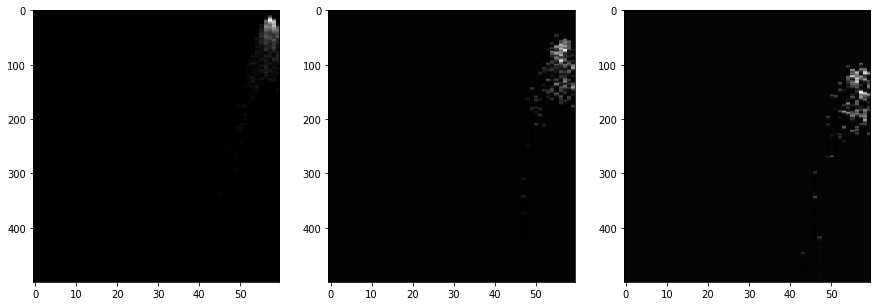

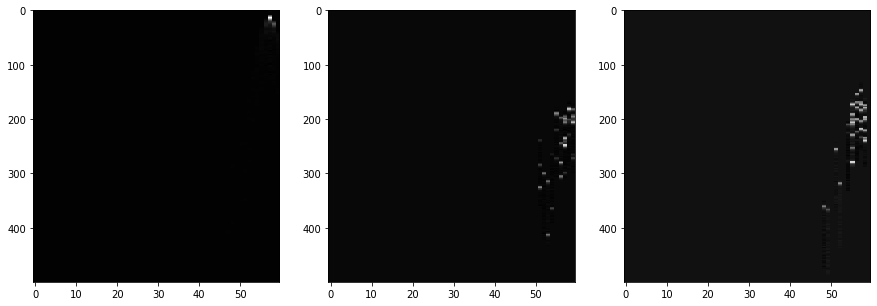

In [29]:
for i, im in enumerate(data['image']):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(im[0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax2 = fig.add_subplot(132)
    ax2.imshow(im[0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax3 = fig.add_subplot(133)
    ax3.imshow(im[0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
    print(data['primary'][i],data['qtot'][i])

In [30]:
data['logan_veto']

array([[(-999., 999., -999., 999., 999., 999., -999.)],
       [(-999., 999., -999., 999., 999., 999., -999.)]],
      dtype=[('SPE_rlogl', '<f4'), ('Cascade_rlogl', '<f4'), ('SPE_rlogl_noDC', '<f4'), ('Cascade_rlogl_noDC', '<f4'), ('FirstHitZ', '<f4'), ('VHESelfVetoVertexPosZ', '<f4'), ('LeastDistanceToPolygon_Veto', '<f4')])

In [31]:
data['hese']

array([[(1757.525, False, [-200.55   ,  -74.03   , -448.82285], 9946., -24.429226)],
       [(   0.   , False, [-279.53   ,   23.17   , -467.58   ], 9895.,   0.      )]],
      dtype=[('qtot', '<f4'), ('vheselfveto', '?'), ('vheselfvetovertexpos', '<f4', (3,)), ('vheselfvetovertextime', '<f4'), ('llhratio', '<f4')])

In [33]:
data['hese_old']

array([[(1757.525, False, [ -200.55   ,   -74.03   ,  -448.82285],  9946., -24.429226)],
       [(   0.   ,  True, [-9999.     , -9999.     , -9999.     ], 99999.,   0.      )]],
      dtype=[('qtot', '<f4'), ('vheselfveto', '?'), ('vheselfvetovertexpos', '<f4', (3,)), ('vheselfvetovertextime', '<f4'), ('llhratio', '<f4')])

In [194]:
data_old.dtype

dtype([('id', [('run_id', '<u4'), ('sub_run_id', '<u4'), ('event_id', '<u4'), ('sub_event_id', '<u4')]), ('image', '<f4', (300, 60)), ('neutrino', [('pdg', '<u4'), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')]), ('daughter', [('pdg', '<u4'), ('energy', '<f4'), ('position', '<f4', (3,)), ('direction', '<f4', (2,)), ('time', '<f4'), ('length', '<f4')]), ('energies', '<f4', (10,)), ('pdgs', '<f4', (10,)), ('logan_veto', [('SPE_rlogl', '<f4'), ('Cascade_rlogl', '<f4'), ('SPE_rlogl_noDC', '<f4'), ('Cascade_rlogl_noDC', '<f4'), ('FirstHitZ', '<f4'), ('VHESelfVetoVertexPosZ', '<f4'), ('LeastDistanceToPolygon_Veto', '<f4')]), ('q_tot', '<f4'), ('cog', '<f4', (3,)), ('q_st', '<f4'), ('st_pos', '<f4', (3,)), ('st_num', '<f4'), ('distance', '<f4'), ('weight', [('PrimaryNeutrinoAzimuth', '<f4'), ('TotalColumnDepthCGS', '<f4'), ('MaxAzimuth', '<f4'), ('SelectionWeight', '<f4'), ('InIceNeutrinoEnergy', '<f4'), ('PowerLawIndex', '<f4'), 